<a href="https://colab.research.google.com/github/keinisha/Habitable_Exoplanets/blob/main/Habitable_Exoplanets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, make_scorer, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, IsolationForest,
                              RandomForestRegressor, AdaBoostClassifier, VotingClassifier, ExtraTreesClassifier)

In [ ]:
pd.set_option('display.max_columns', None)  # to show all columns in df

url = "https://raw.githubusercontent.com/keinisha/Habitable_Exoplanets/main/Planetary%20Systems.csv"
df = pd.read_csv(url)
df.rename(columns={'pl_name': 'Planet'}, inplace=True)
df.head()

,loc_rowid,Planet,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassprov,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,ttv_flag,st_spectype,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_metratio,st_logg,st_loggerr1,st_loggerr2,st_logglim,rastr,ra,decstr,dec,sy_dist,sy_disterr1,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
0,1,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,326.03000,0.32,-0.32,0.0,1.29,0.05,-0.05,0.0,12.1,NaN,NaN,0.0,1.08,NaN,NaN,0.0,6165.6000,476.7000,-476.7000,0.0,19.40,1.50,-1.50,0.0,Msini,0.231,0.005,-0.005,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,G8 III,4742.0,100.0,-100.0,0.0,19.00,2.00,-2.00,0.0,2.70,0.30,-0.30,0.0,-0.35,0.09,-0.09,0.0,[Fe/H],2.31,0.10,-0.10,0.0,12h20m42.91s,185.178779,+17d47m35.71s,17.793252,93.1846,1.9238,-1.9238,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
1,2,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,516.21997,3.20,-3.20,0.0,1.53,0.07,-0.07,0.0,12.3,NaN,NaN,0.0,1.09,NaN,NaN,0.0,4684.8142,794.5750,-794.5750,0.0,14.74,2.50,-2.50,0.0,Msini,0.080,0.030,-0.030,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,K4 III,4213.0,46.0,-46.0,0.0,29.79,2.84,-2.84,0.0,2.78,0.69,-0.69,0.0,-0.02,NaN,NaN,0.0,[Fe/H],1.93,0.07,-0.07,0.0,15h17m05.90s,229.274595,+71d49m26.19s,71.823943,125.3210,1.9765,-1.9765,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903
2,3,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,0,185.84000,0.23,-0.23,0.0,0.83,NaN,NaN,0.0,12.9,NaN,NaN,0.0,1.15,NaN,NaN,0.0,1525.5000,NaN,NaN,0.0,4.80,NaN,NaN,0.0,Msini,0.000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,K0 III,4813.0,20.0,-20.0,0.0,11.00,1.00,-1.00,0.0,2.20,0.10,-0.20,0.0,-0.24,0.03,-0.03,0.0,[Fe/H],2.63,0.07,-0.07,0.0,23h31m17.80s,352.824150,+39d14m09.01s,39.235837,75.4392,0.7140,-0.7140,5.23133,0.023,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826
3,4,14 Her b,14 Her,1,2,Radial Velocity,2002,W. M. Keck Observatory,0,1773.40002,2.50,-2.50,0.0,2.93,0.08,-0.08,0.0,12.9,NaN,NaN,0.0,1.15,NaN,NaN,0.0,1481.0878,47.6745,-47.6745,0.0,4.66,0.15,-0.15,0.0,Msini,0.370,0.000,0.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,K0 V,5338.0,25.0,-25.0,0.0,0.93,0.01,-0.01,0.0,0.90,0.04,-0.04,0.0,0.41,NaN,NaN,0.0,[Fe/H],4.45,0.02,-0.02,0.0,16h10m24.50s,242.602101,+43d48m58.90s,43.816362,17.9323,0.0073,-0.0073,6.61935,0.023,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351
4,5,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,Multiple Observatories,0,798.50000,1.00,-1.00,0.0,1.66,0.03,-0.03,0.0,13.5,NaN,NaN,0.0,1.20,NaN,NaN,0.0,565.7374,25.4264,-25.4264,0.0,1.78,0.08,-0.08,0.0,Msini,0.680,0.020,-0.020,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,G3 V,5750.0,8.0,-8.0,0.0,1.13,0.01,-0.01,0.0,1.08,0.04,-0.04,0.0,0.06,NaN,NaN,0.0,[Fe/H],4.36,0.01,-0.01,0.0,19h41m51.75s,295.465642,+50d31m00.57s,50.516824,21.1397,0.0110,-0.0111,6.21500,0.016,-0.016,4.651,0.016,-0.016,6.06428,0.000603,-0.000603


In [ ]:
# making a new dataframe that will determine Habitability of a Planet
ndf = pd.read_csv(url, usecols=['pl_name', 'hostname', 'pl_orbsmax', 'pl_rade', 'pl_bmasse', 'st_teff', 'st_rad', 'st_mass'])
ndf.rename(columns={'pl_name': 'Planet', 'hostname': 'Star', 'pl_orbsmax': 'POrbit', 'pl_rade': 'PRadius',
                    'pl_bmasse': 'PMass', 'st_teff': 'STemp', 'st_rad': 'SRadius', 'st_mass': 'SMass'}, inplace=True)
print(ndf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5044 entries, 0 to 5043
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Planet   5044 non-null   object 
 1   Star     5044 non-null   object 
 2   POrbit   4776 non-null   float64
 3   PRadius  5030 non-null   float64
 4   PMass    5021 non-null   float64
 5   STemp    4904 non-null   float64
 6   SRadius  4885 non-null   float64
 7   SMass    5040 non-null   float64
dtypes: float64(6), object(2)
memory usage: 315.4+ KB
None


In [ ]:
# taking luminosity of sol as 1 and radii of sol as 1
# SLum/SSun = (SRadius/SunRadius)^2 * (STemp/SunTemp)^4
ndf['SLum'] = ndf['SRadius'].pow(2) * ((ndf['STemp'])/5778).pow(4)
# The most important factor to finding whether a planet is habitable or not is its distance from it's sun. The planet should be in the Goldilocks' area, just right.
# We use the Luminosity to find this area.
ndf['HZCenter(AU)'] = ndf['SLum'].apply(np.sqrt)
ndf['HZInner(AU)'] = 0.75*ndf['HZCenter(AU)']
ndf['HZOuter(AU)'] = 1.77*ndf['HZCenter(AU)']
# Planet temperature will tell us whether the planet is warm (within the range of 248.15 and 318.15). This range is based on the temperature range of Earth, anything above is 
# considered hot and below is cold.
# Since alot of PTemp rows are mostly empty I'll try to find PTemp on my own using formulas
# PTemp can be found using PFlux.
# Since even the flux column was mostly empty in the original dataset i found it using some formulas online
# Flux is proportional to Temperature^4 hence
# Temp = (PFlux/(5.67*10^-8*4.361*10^-3))^1/4
# first we find flux then use it to find the temperature.
ndf['PFlux'] = (ndf['SLum']*13)/(4*3.14*ndf['POrbit'].pow(2))
ndf['PTemp'] = (ndf['PFlux']/(5.67*pow(10, -8)*4.361*pow(10, -3))).pow(0.25)

In [ ]:
# Now that we know the distances we make a column to tell us in binary whether our planet lies in these zones
# inner + outer is the optimistic habitable zone
# center + outer is the conservative habitable zone
def opcond(s):
    if (s['POrbit'] > s['HZInner(AU)']) and (s['POrbit'] < s['HZOuter(AU)']):
        return 1
    else:
        return 0
ndf['HZOp'] = ndf.apply(opcond, axis=1)

def concond(s):
    if (s['POrbit'] > s['HZCenter(AU)']) and (s['POrbit'] < s['HZOuter(AU)']):
        return 1
    else:
        return 0
ndf['HZCon'] = ndf.apply(concond, axis=1)

In [ ]:
# We also need to have a planet to be big enough, 
# Types of planets are classified according to the mass of the planet as compared to the mass of Earth
# The types are -> Super-Earth, Terran, Jovian and Neptunian
def ptype(s):
    if (s['PMass'] > 0.1) and (s['PMass'] < 2):
        return 'Terran'
    elif (s['PMass'] > 2) and (s['PMass'] < 10):
        return 'SuperEarth'
    elif (s['PMass'] > 10) and (s['PMass'] < 50):
        return 'Neptunian'
    elif s['PMass'] > 50:
        return 'Jovian'
    else:
        return ''
ndf['PType'] = ndf.apply(ptype, axis=1)

In [ ]:
# And we ofcourse dont want our planet to be too hot or too cold. So we divide out planets into hot, warm and cold.
def temp(s):
    if (s['PTemp'] < 180) and (s['PTemp'] > 0):
        return 'Cold'
    elif (s['PTemp'] < 290) and (s['PTemp'] > 180):
        return 'Warm'
    elif s['PTemp'] > 290:
        return 'Hot'
    else:
        return ''
ndf['PTempType'] = ndf.apply(temp, axis=1)

In [ ]:
# finally we define habitable or not based on temp, size and its habitable zone
def hab(s):
    if (s['PTempType'] == 'Warm') and (s['PType'] == 'SuperEarth') and (s['HZOp'] == 1):
        return 2  # optimistic
    elif (s['PTempType'] == 'Warm') and (s['PType'] == 'Terran') and (s['HZCon'] == 1):
        return 1  # conservative
    else:
        return 0  # not habitable
ndf['Habitability'] = ndf.apply(hab, axis=1)

In [ ]:
# since we are only looking for habitable planets we drop the rows with 'Habitability' 0 in a different df x
x = ndf[ndf.Habitability != 0]
habpnames = x.Planet.values
ndf['Habitable'] = ndf['Planet'].isin(habpnames)  # all habitable planets (opt and cons) are true else false

def habitable(s):
    if s['Habitable']:
        return 1
    else:
        return 0
ndf['Habitable'] = ndf.apply(habitable, axis=1)

In [ ]:
ndf.head()

,Planet,Star,POrbit,PRadius,PMass,STemp,SRadius,SMass,SLum,HZCenter(AU),HZInner(AU),HZOuter(AU),PFlux,PTemp,HZOp,HZCon,PType,PTempType,Habitability,Habitable
0,11 Com b,11 Com,1.29,12.1,6165.6000,4742.0,19.00,2.70,163.773357,12.797396,9.598047,22.651392,101.863253,801.146794,0,0,Jovian,Hot,0,0
1,11 UMi b,11 UMi,1.53,12.3,4684.8142,4213.0,29.79,2.78,250.839943,15.837927,11.878446,28.033131,110.909193,818.369810,0,0,Jovian,Hot,0,0
2,14 And b,14 And,0.83,12.9,1525.5000,4813.0,11.00,2.20,58.255732,7.632544,5.724408,13.509603,87.525821,771.332734,0,0,Jovian,Hot,0,0
3,14 Her b,14 Her,2.93,12.9,1481.0878,5338.0,0.93,0.90,0.630043,0.793752,0.595314,1.404942,0.075961,132.389895,0,0,Jovian,Cold,0,0
4,16 Cyg B b,16 Cyg B,1.66,13.5,565.7374,5750.0,1.13,1.08,1.252328,1.119075,0.839306,1.980762,0.470387,208.843819,1,1,Jovian,Warm,0,0


In [ ]:
ndf.isnull().sum()

Planet            0
Star              0
POrbit          268
PRadius          14
PMass            23
STemp           140
SRadius         159
SMass             4
SLum            161
HZCenter(AU)    161
HZInner(AU)     161
HZOuter(AU)     161
PFlux           427
PTemp           427
HZOp              0
HZCon             0
PType             0
PTempType         0
Habitability      0
Habitable         0
dtype: int64

In [ ]:
df.isnull().sum()

loc_rowid           0
Planet              0
hostname            0
sy_snum             0
sy_pnum             0
                 ... 
sy_kmagerr1       165
sy_kmagerr2       177
sy_gaiamag        184
sy_gaiamagerr1    186
sy_gaiamagerr2    186
Length: 85, dtype: int64

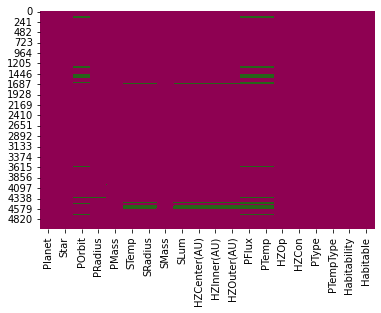

In [ ]:
# Cleaning datasets and merging
# making a graph to show null values
map1 = sns.heatmap(ndf.isnull(), cbar=False, cmap='PiYG')
plt.show()

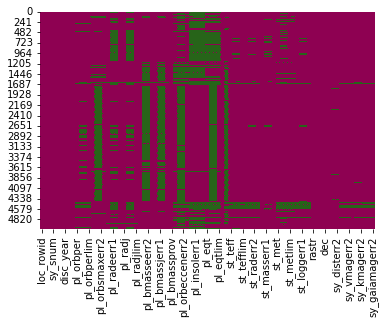

In [ ]:
# making a graph to show null values
map1 = sns.heatmap(df.isnull(), cbar=False, cmap='PiYG')
plt.show()

In [ ]:
# drop unwanted columns
df.drop(['pl_orbpererr1', 'pl_orbpererr2', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_radeerr1', 'pl_radeerr2',
         'pl_radjerr1', 'pl_radjerr2', 'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmassjerr1', 'pl_bmassjerr2',
         'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol', 'pl_insolerr1',
         'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim', 'st_spectype',
         'st_meterr1', 'st_meterr2', 'discoverymethod', 'loc_rowid', 'hostname', 'disc_year', 'disc_facility',
         'sy_gaiamagerr2', 'sy_gaiamagerr1', 'sy_kmagerr1', 'sy_kmagerr2', 'sy_vmagerr1', 'sy_vmagerr2', 'sy_disterr1',
         'sy_disterr2', 'st_loggerr1', 'st_loggerr2', 'st_meterr2', 'st_meterr1', 'st_masserr2', 'st_masserr1',
         'st_raderr2', 'st_raderr1', 'st_tefferr2', 'st_tefferr1', 'hostname', 'pl_orbsmax', 'pl_rade', 'pl_bmasse',
         'st_teff', 'st_rad', 'st_mass', 'pl_bmasselim', 'pl_bmassjlim', 'pl_radjlim', 'pl_radelim', 'st_metlim',
         'pl_orbperlim', 'st_metratio'], axis=1, inplace=True)

In [ ]:
# drop null rows in df
df.dropna(how='any', axis=0, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4372 entries, 0 to 5043
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Planet           4372 non-null   object 
 1   sy_snum          4372 non-null   int64  
 2   sy_pnum          4372 non-null   int64  
 3   pl_controv_flag  4372 non-null   int64  
 4   pl_orbper        4372 non-null   float64
 5   pl_orbsmaxlim    4372 non-null   float64
 6   pl_radj          4372 non-null   float64
 7   pl_bmassj        4372 non-null   float64
 8   pl_bmassprov     4372 non-null   object 
 9   ttv_flag         4372 non-null   int64  
 10  st_tefflim       4372 non-null   float64
 11  st_radlim        4372 non-null   float64
 12  st_masslim       4372 non-null   float64
 13  st_met           4372 non-null   float64
 14  st_logg          4372 non-null   float64
 15  st_logglim       4372 non-null   float64
 16  rastr            4372 non-null   object 
 17  ra            

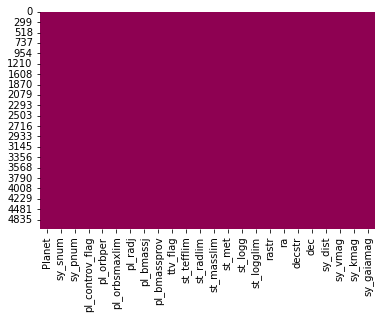

In [ ]:
# making a graph to show null values
map1 = sns.heatmap(df.isnull(), cbar=False, cmap='PiYG')
plt.show()

In [ ]:
# merge original df with unnecessary values and ndf with important values
ndf1 = pd.merge(df, ndf, on='Planet')

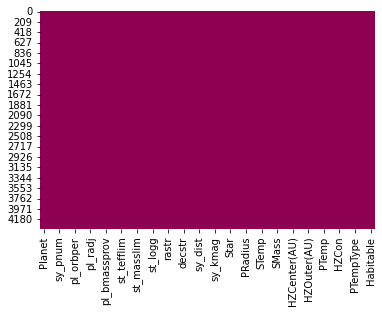

In [ ]:
# making a graph to show null values
map1 = sns.heatmap(ndf1.isnull(), cbar=False, cmap='PiYG')
plt.show()

In [ ]:
# EDA
ndf1.describe()

,sy_snum,sy_pnum,pl_controv_flag,pl_orbper,pl_orbsmaxlim,pl_radj,pl_bmassj,ttv_flag,st_tefflim,st_radlim,st_masslim,st_met,st_logg,st_logglim,ra,dec,sy_dist,sy_vmag,sy_kmag,sy_gaiamag,POrbit,PRadius,PMass,STemp,SRadius,SMass,SLum,HZCenter(AU),HZInner(AU),HZOuter(AU),PFlux,PTemp,HZOp,HZCon,Habitability,Habitable
count,4372.000000,4372.000000,4372.000000,4.372000e+03,4372.0,4372.000000,4372.000000,4372.000000,4372.0,4372.0,4372.0,4372.000000,4372.000000,4372.0,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4.372000e+03,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000
mean,1.099039,1.788198,0.002745,9.227060e+04,0.0,0.477042,1.087302,0.075252,0.0,0.0,0.0,0.014252,4.365778,0.0,245.488313,25.442734,569.097182,12.787979,10.732216,12.542714,2.179288,5.346393,345.370865,5429.073660,1.517219,0.989858,5.510978,1.281453,0.961090,2.268171,5.939400e+02,799.416795,0.052379,0.032708,0.024931,0.013038
std,0.335539,1.164552,0.052324,6.079750e+06,0.0,0.457703,6.317880,0.263827,0.0,0.0,0.0,0.179272,0.420728,0.0,86.227161,32.917296,489.359769,2.995335,2.971983,2.989476,113.525541,5.129644,2006.777115,973.692882,3.625693,0.421895,49.631278,1.967166,1.475374,3.481884,1.092015e+04,453.133448,0.222815,0.177892,0.219337,0.113448
min,1.000000,1.000000,0.000000,1.797190e-01,0.0,0.026000,0.000120,0.000000,0.0,0.0,0.0,-1.000000,1.300000,0.0,0.185606,-88.121111,3.202600,3.230060,0.190000,2.926270,0.005800,0.296000,0.037400,2566.000000,0.110000,0.090000,0.000560,0.023667,0.017750,0.041890,3.373916e-10,1.080790,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,4.560447e+00,0.0,0.154000,0.012087,0.000000,0.0,0.0,0.0,-0.070000,4.290000,0.0,213.063073,7.034655,147.151500,11.297000,9.195500,10.970350,0.052500,1.730000,3.857500,5018.000000,0.800000,0.820000,0.407686,0.638503,0.478877,1.130150,1.262483e+01,475.350648,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.174096e+01,0.0,0.237000,0.025300,0.000000,0.0,0.0,0.0,0.020000,4.450000,0.0,288.163204,41.405804,473.321500,13.718000,11.831000,13.542400,0.097350,2.660000,8.050000,5593.000000,0.970000,0.960000,0.898710,0.948003,0.711002,1.677965,7.314577e+01,737.488108,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,0.000000,4.019269e+01,0.0,0.899250,0.334250,0.000000,0.0,0.0,0.0,0.120000,4.560000,0.0,294.113699,46.103447,861.527000,15.086000,12.986500,14.877625,0.226600,10.088000,106.118263,5913.000000,1.260000,1.110000,1.860872,1.364138,1.023103,2.414524,2.865154e+02,1037.515746,0.000000,0.000000,0.000000,0.000000
max,4.000000,8.000000,1.000000,4.020000e+08,0.0,2.720000,144.000000,1.000000,0.0,0.0,0.0,0.560000,5.520000,0.0,359.974984,85.736533,3460.510000,18.190000,15.495000,17.260400,7506.000000,30.488000,45700.000000,29564.000000,83.800000,10.940000,1850.884215,43.021904,32.266428,76.148770,6.100993e+05,7047.869379,1.000000,1.000000,2.000000,1.000000


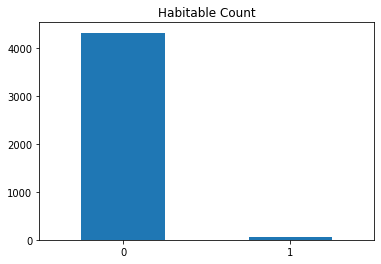

In [ ]:
# seeing the distribution of our target column
tc = ndf1['Habitable'].value_counts()
map2 = tc.plot(kind='bar', title='Habitable Count', rot=0) # it is clear that our data is uneven

Text(0.5, 1.0, 'Temperature - Mass Relation with Habitability')

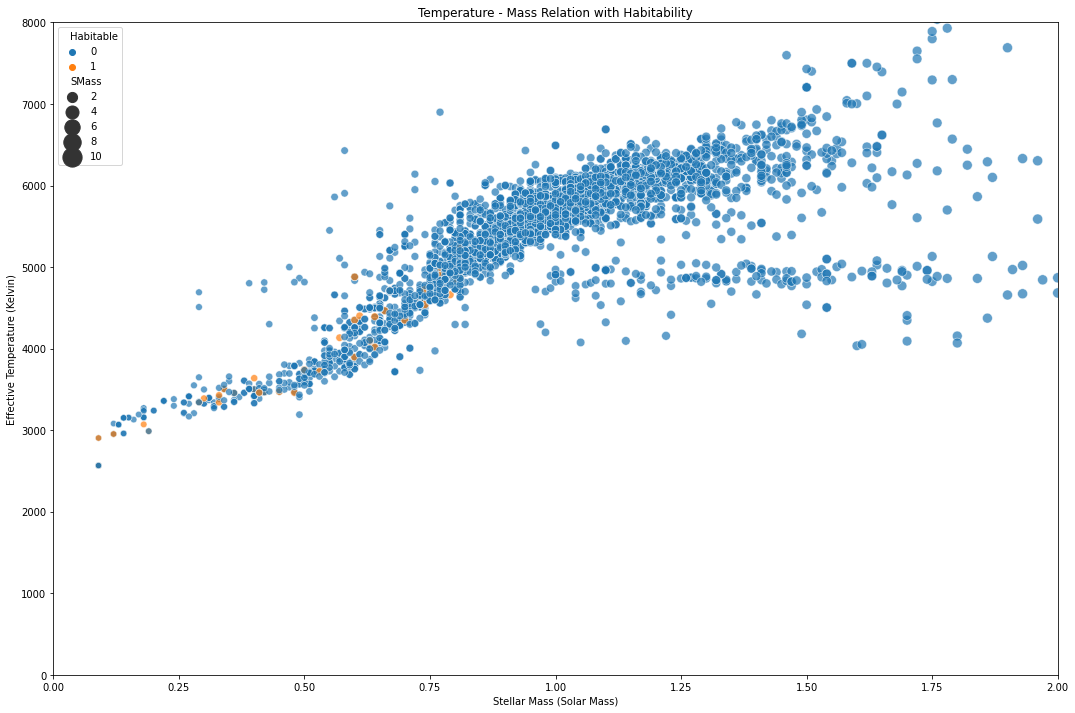

In [ ]:
# seeing how temp and mass relate with habitability
plt.figure(figsize=(18, 12))
tm = sns.scatterplot(x='SMass', y='STemp', hue='Habitable', size='SMass', sizes=(40, 400), alpha=.7, data=ndf1)
# limiting x and y axis's values
tm.axis([0, 2, 0, 8000])
tm.set_xlabel('Stellar Mass (Solar Mass)')
tm.set_ylabel('Effective Temperature (Kelvin)')
tm.set_title('Temperature - Mass Relation with Habitability')

Text(0, 0.5, 'Dec [decimal degrees]')

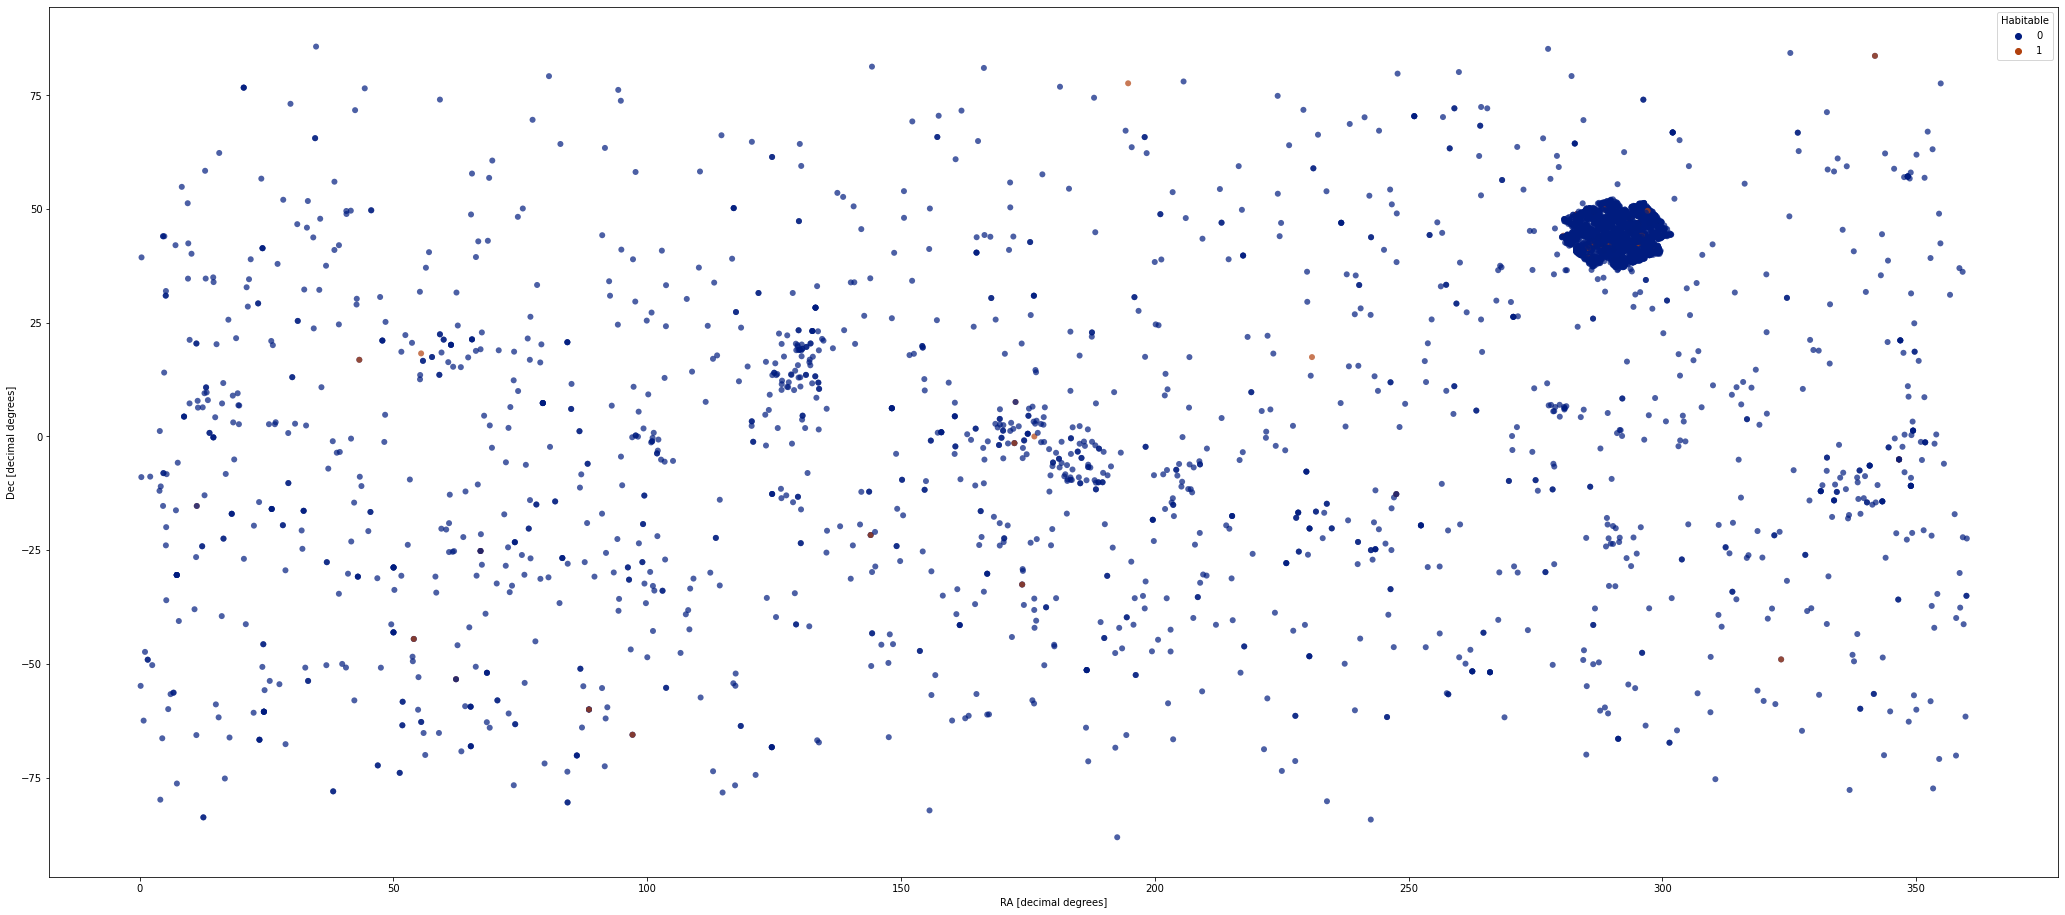

In [ ]:
# seeing how declination(dec) and ra(right ascension) affect habitability
plt.figure(figsize=(36, 16))
rd = sns.scatterplot(x='ra', y='dec', hue='Habitable', alpha=.7, palette='dark', sizes=(1, 8), linewidth=0, data=ndf1)
rd.set_xlabel('RA [decimal degrees]')
rd.set_ylabel('Dec [decimal degrees]') 

In [ ]:
ndf1.drop(['pl_orbsmaxlim', 'st_tefflim', 'st_radlim', 'st_masslim', 'st_logglim'], axis=1, inplace=True)

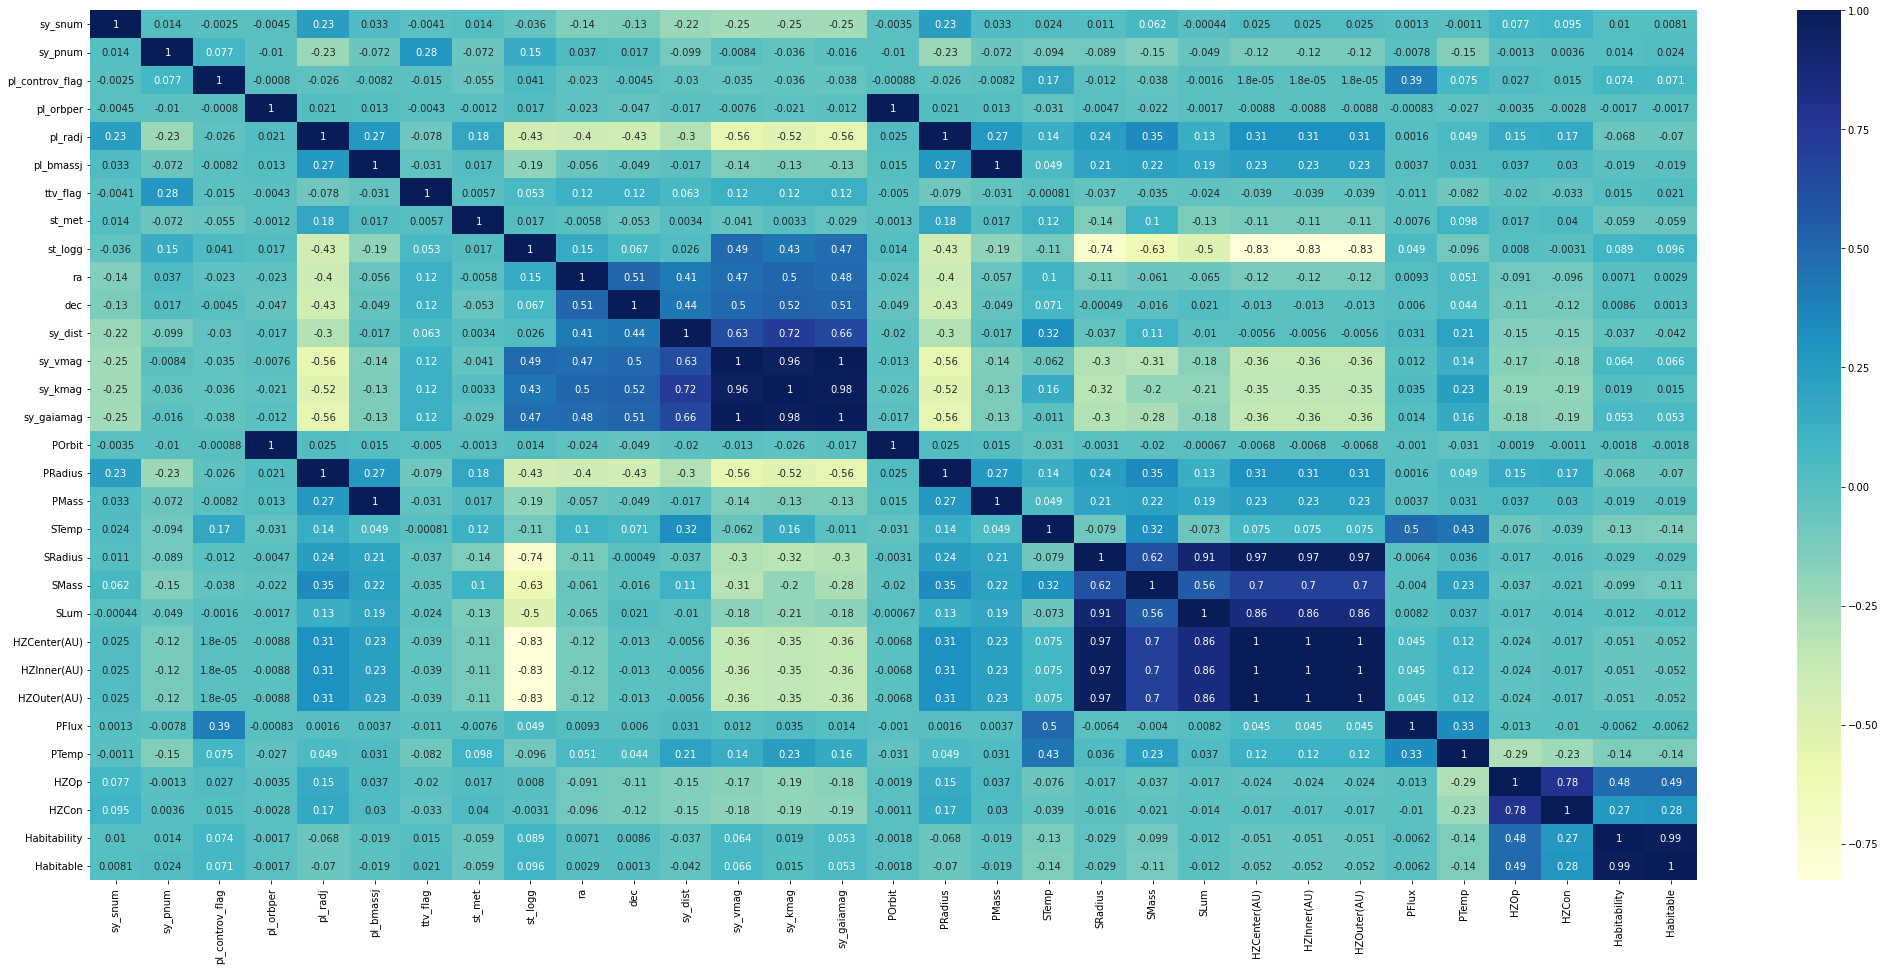

In [ ]:
# correlations of ndf1 with target column
plt.figure(figsize=(36, 16))
corrmat = ndf1.corr()
# corrdf = pd.DataFrame(corrmat['Habitable'].sort_values(ascending=False))
sns.heatmap(corrmat, cmap="YlGnBu", annot=True)

<Figure size 1080x504 with 0 Axes>

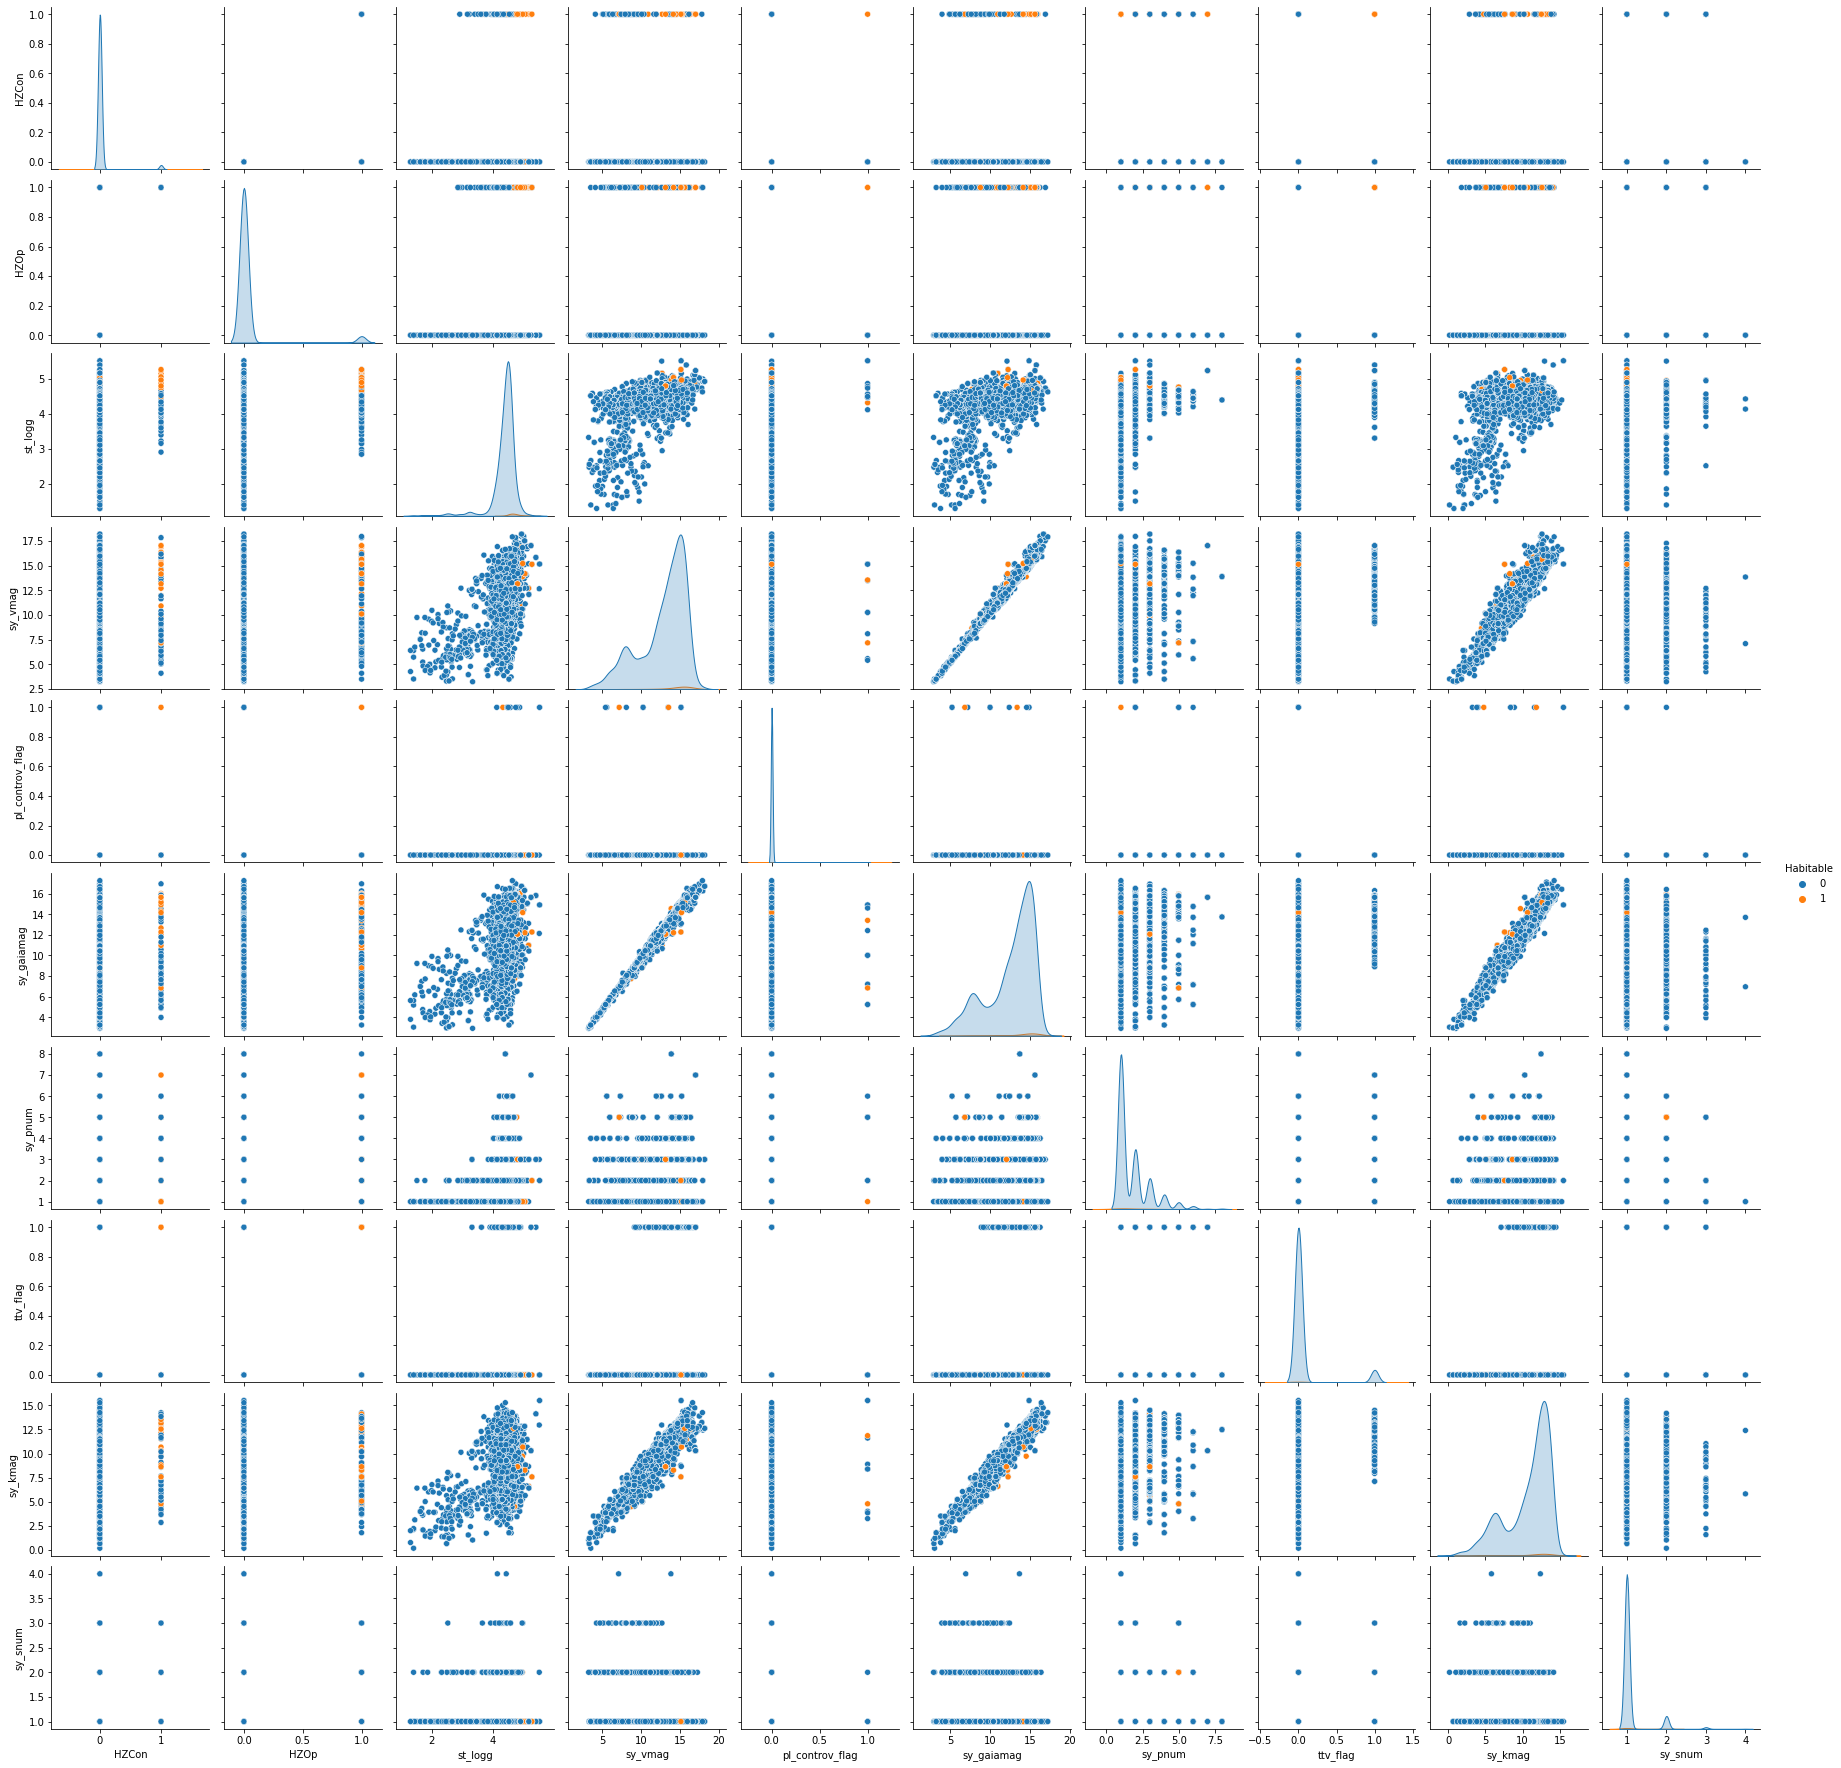

In [ ]:
# making a pairplot of positive correaltions
plt.figure(figsize=(15, 7))
ptive = sns.pairplot(ndf1[['Habitable', 'HZCon', 'HZOp', 'st_logg', 'sy_vmag', 'pl_controv_flag', 'sy_gaiamag',
                           'sy_pnum', 'ttv_flag', 'sy_kmag', 'sy_snum']], hue='Habitable')

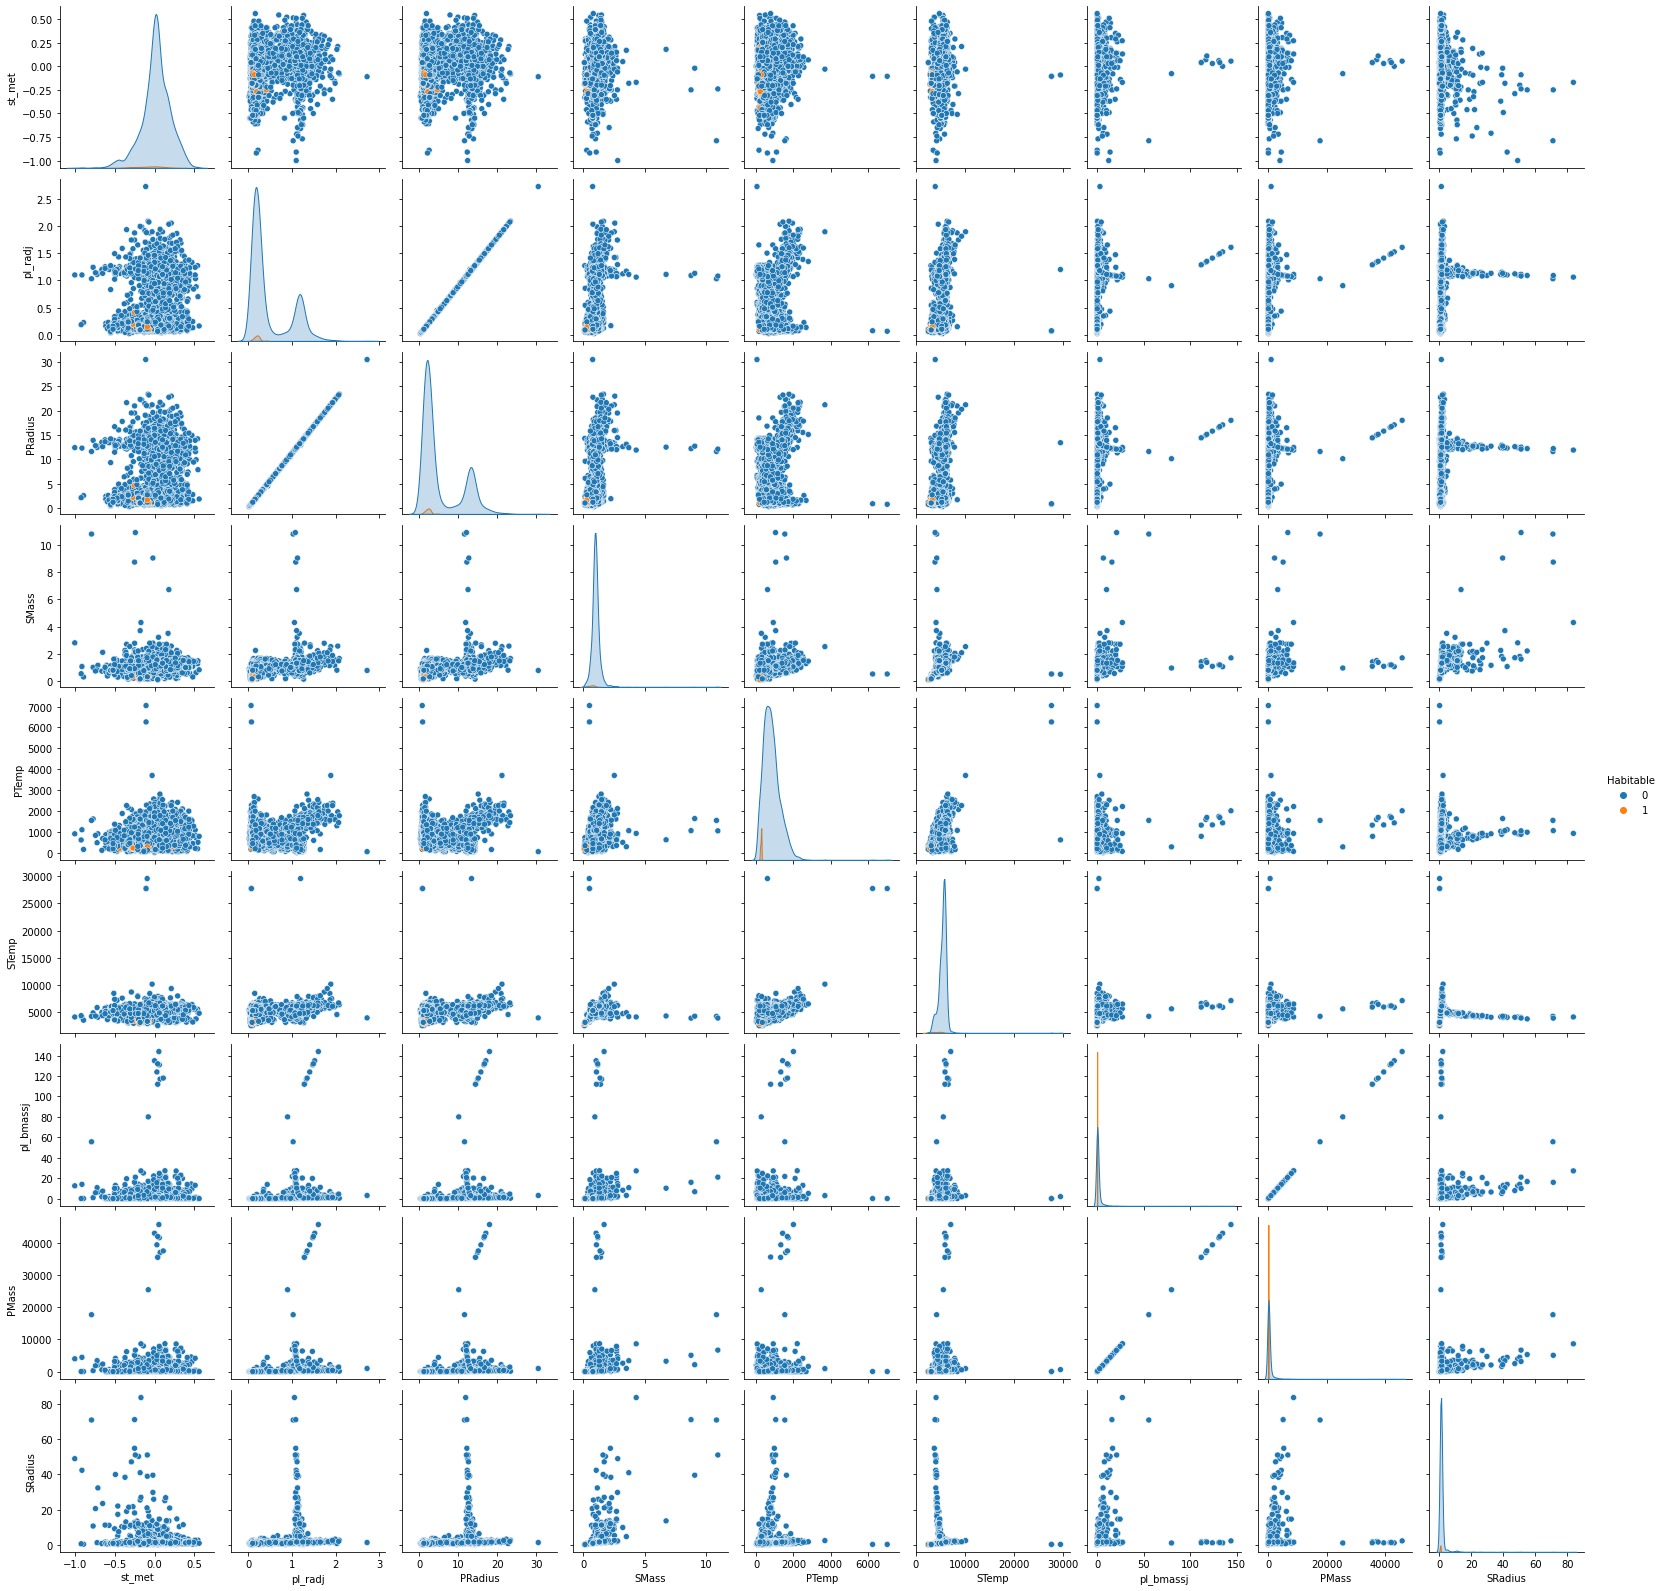

In [ ]:
# making a pairplot of negative correaltion
ntive = sns.pairplot(ndf1[['Habitable', 'st_met', 'pl_radj', 'PRadius', 'SMass', 'PTemp', 'STemp', 'pl_bmassj',
                           'PMass', 'SRadius']], hue='Habitable')

In [ ]:
# Machine Learning
copydf = ndf1.copy()
# removing object type columns as they cannot be smoted
copydf.drop(['Planet', 'pl_bmassprov', 'rastr', 'decstr', 'Star', 'PType', 'PTempType'], axis=1, inplace=True)
ndf1.describe()

In [ ]:
corrdf.tail(5)

,Habitable
pl_orbsmaxlim,NaN
st_tefflim,NaN
st_radlim,NaN
st_masslim,NaN
st_logglim,NaN


In [ ]:
# removing these correlations
copydf.drop(['pl_orbsmaxlim', 'st_tefflim', 'st_radlim', 'st_masslim', 'st_logglim'], axis=1, inplace=True)

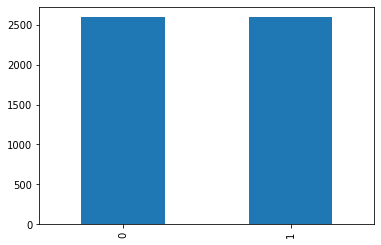

In [ ]:
# Splitting test and train
X_train, X_test, y_train, y_test = train_test_split(copydf.iloc[:, :-1], copydf.loc[:, 'Habitable'], test_size=0.4, random_state=76)
# we know that our data is imbalanced hence we use SMOTE to balance it
X_smote, y_smote = SMOTE(sampling_strategy='minority', random_state=76).fit_resample(X_train, y_train)
pd.Series(y_smote).value_counts().plot.bar()
plt.show() # balanced as all things should be

In [ ]:
evaluation = []
models = []

In [ ]:
# Applying Models
# Logistic Regression
lr = LogisticRegression(max_iter=5000)
lr.fit(X_smote, y_smote)
y_predlr = lr.predict(X_test)
lr_acc = round(lr.score(X_smote, y_smote) * 100, 2)
lr_acc_test = round(accuracy_score(y_test, y_predlr) * 100, 2)
print(f'Train Accuracy of Logistic Regression: {lr_acc}%')
print(f'Test Accuracy of Logistic Regression: {lr_acc_test}%')
# Get precision, recall, and f1
precision, recall, f1, support = score(y_test, y_predlr, average='macro')
print(f'Precision : {precision}')
print(f'Recall : {recall}')
print(f'F1-score : {f1}')
print(f'Support : {support}')

Train Accuracy of Logistic Regression: 100.0%
Test Accuracy of Logistic Regression: 99.94%
Precision : 0.9807692307692308
Recall : 0.9997099767981439
F1-score : 0.9900510247615146
Support : None


In [ ]:
evaluation.append(dict([
    ('Model', 'Logistic Regression'),
    ('Train Accuracy', round(lr_acc, 2)),
    ('Test Accuracy', round(lr_acc_test, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1, 2))
     ]))

In [ ]:
# K Nearest Neighbours
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_smote, y_smote)
y_predknn = knn.predict(X_test)
knn_acc = round(knn.score(X_smote, y_smote) * 100, 2)
knn_acc_test = round(accuracy_score(y_test, y_predknn) * 100, 2)
print(f'Train Accuracy of KNN: {knn_acc}%')
print(f'Test Accuracy of KNN: {knn_acc_test}%')
# Get precision, recall, and f1
precision, recall, f1, support = score(y_test, y_predknn, average='macro')
print(f'Precision : {precision}')
print(f'Recall : {recall}')
print(f'F1-score : {f1}')
print(f'Support : {support}')

Train Accuracy of KNN: 99.11%
Test Accuracy of KNN: 97.71%
Precision : 0.6830284932188627
Recall : 0.9095591647331787
F1-score : 0.7502427600388417
Support : None


In [ ]:
evaluation.append(dict([
    ('Model', 'K-Nearest Neighbors'),
    ('Train Accuracy', round(knn_acc, 2)),
    ('Test Accuracy', round(knn_acc_test, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1, 2))
     ]))

In [ ]:
# Linear SVC
svc = SVC(kernel='linear', gamma=0.001, C=100, probability=True)
svc.fit(X_smote, y_smote)
y_predsvc = svc.predict(X_test)
svc_acc = round(svc.score(X_smote, y_smote) * 100, 2)
svc_acc_test = round(accuracy_score(y_test, y_predsvc) * 100, 2)
print(f'Train Accuracy Score of LinearSVC: % {svc_acc}')
print(f'Test Accuracy Score of LinearSVC: % {svc_acc_test}')
# Get precision, recall, f1 scores
precision, recall, f1, support = score(y_test, y_predsvc, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1}')
print(f'Support : {support}')

Train Accuracy Score of LinearSVC: % 99.98
Test Accuracy Score of LinearSVC: % 99.94
Precision : 0.9807692307692308
Recall    : 0.9997099767981439
F1-score   : 0.9900510247615146
Support : None


In [ ]:
evaluation.append(dict([
    ('Model', 'Linear SVC'),
    ('Train Accuracy', round(svc_acc, 2)),
    ('Test Accuracy', round(svc_acc_test, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1, 2))
     ]))

In [ ]:
# Naive Bayes
nbg = GaussianNB()
nbg.fit(X_smote, y_smote)
y_prednbg = nbg.predict(X_test)
nbg_acc = round(nbg.score(X_smote, y_smote) * 100, 2)
nbg_acc_test = round(accuracy_score(y_test, y_prednbg) * 100, 2)
print(f'Train Accuracy Score of GaussianNB: % {nbg_acc}')
print(f'Test Accuracy Score of GaussianNB: % {nbg_acc_test}')
# Get precision, recall, f1 scores
precision, recall, f1, support = score(y_test, y_prednbg, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1}')
print(f'Support    : {support}')

In [ ]:
evaluation.append(dict([
    ('Model', 'Gaussian Naive Bayes'),
    ('Train Accuracy', round(nbg_acc, 2)),
    ('Test Accuracy', round(nbg_acc_test, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1, 2))
     ]))

In [ ]:
num_estimator = 100
seed = 7
# Ada Boost Classifier
abc = AdaBoostClassifier(base_estimator=lr, n_estimators=num_estimator, random_state = seed)
abc.fit(X_smote, y_smote)
y_predabc = abc.predict(X_test)
abc_acc = round(abc.score(X_smote, y_smote) *100 , 2)
abc_acc_test = round(accuracy_score(y_test, y_predabc) * 100 ,2)
print(f'Train Accuracy Score of AdaBoostClassifier: % {abc_acc}')
print(f'Test Accuracy Score of AdaBoostClassifier: % {abc_acc_test}')
# Get precision, recall, f1 scores
precision, recall, f1score, support = score(y_test, y_predabc, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')
print(f'Support    : {support}')

In [ ]:
evaluation.append(dict([
    ('Model', 'AdaBoost Classifier'),
    ('Train Accuracy', round(abc_acc, 2)),
    ('Test Accuracy', round(abc_acc_test, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1score, 2))
     ]))

In [ ]:
# XG Boost Classifier
xgboost = xgb.XGBClassifier(silent=False, scale_pos_weight=1, learning_rate=0.01, colsample_bytree=0.4,
                            subsample=0.8, objective='binary:logistic', n_estimators=1000, reg_alpha=0.3, max_depth=4, gamma=10)
xgboost.fit(X_smote, y_smote)
y_predxgb = xgboost.predict(X_test)
xg_acc = round(xgboost.score(X_smote, y_smote) * 100, 2)
xg_acc_test = round(accuracy_score(y_test, y_predxgb) * 100, 2)
print(f'Train Accuracy Score of Hard VotingClassifier: % {xg_acc}')
print(f'Test Accuracy Score of Hard VotingClassifier: % {xg_acc_test}')
# Get precision, recall, f1 scores
precision, recall, f1score, support = score(y_test, y_predxgb, average='macro')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

In [ ]:
evaluation.append(dict([
    ('Model', 'XGBoost'),
    ('Train Accuracy', round(xg_acc, 2)),
    ('Test Accuracy', round(xg_acc_test, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1score, 2))
     ]))

In [ ]:
results = pd.DataFrame(data=evaluation)
results = results[['Model', 'Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
results = results.sort_values(by='Recall', ascending=False)
results = results.set_index('Model')
results

,Train Accuracy,Test Accuracy,Precision,Recall,F1
Model,,,,,
Logistic Regression,100.00,99.94,0.98,1.00,0.99
Linear SVC,99.98,99.94,0.98,1.00,0.99
AdaBoost Classifier,99.61,99.60,0.89,1.00,0.94
XGBoost,100.00,99.89,0.96,1.00,0.98
K-Nearest Neighbors,99.11,97.71,0.68,0.91,0.75
Gaussian Naive Bayes,65.53,30.87,0.51,0.65,0.25


In [ ]:
conf_svc = confusion_matrix(y_test, y_predsvc)
conf_lr = confusion_matrix(y_test, y_predlr)
conf_abc = confusion_matrix(y_test, y_predabc)
conf_xg = confusion_matrix(y_test, y_predxgb)
conf_knn = confusion_matrix(y_test, y_predknn)
conf_nbg = confusion_matrix(y_test, y_prednbg)

def conf_matrix(x):
    plt.figure(dpi=125)
    sns.heatmap(x, cmap=plt.cm.Reds, annot=True, square=True,fmt='d',
               xticklabels=['not habitable', 'habitable'],
               yticklabels=['not habitable', 'habitable'])

    plt.xlabel('Predicted planets')
    plt.ylabel('Actual planets')

Text(0.5, 1.0, 'Confusion Matrix of Linear SVC')

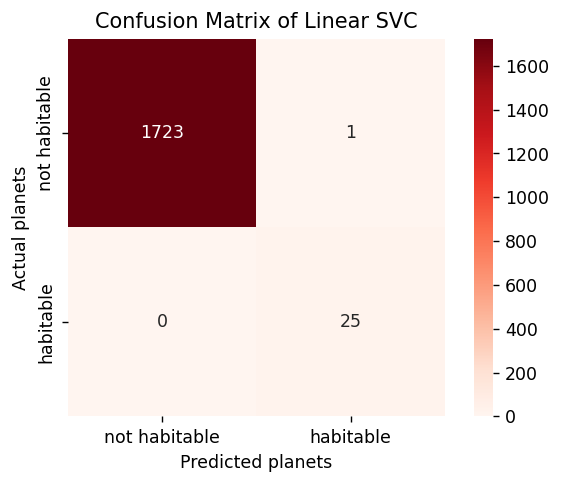

In [ ]:
conf_matrix(conf_svc)
plt.title('Confusion Matrix of Linear SVC')

Text(0.5, 1.0, 'Confusion Matrix of Logistic Regression')

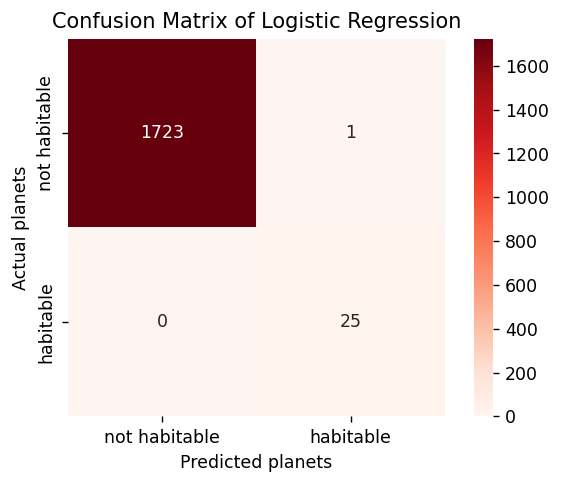

In [ ]:
conf_matrix(conf_lr)
plt.title('Confusion Matrix of Logistic Regression')

Text(0.5, 1.0, 'Confusion Matrix of AdaBoost Classification')

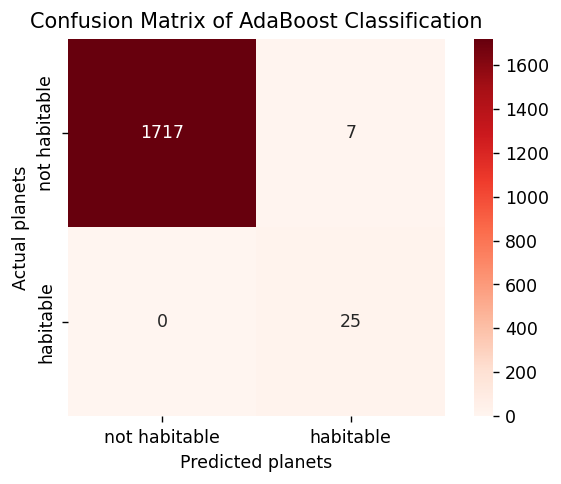

In [ ]:
conf_matrix(conf_abc)
plt.title('Confusion Matrix of AdaBoost Classification')

Text(0.5, 1.0, 'Confusion Matrix of XGBoost')

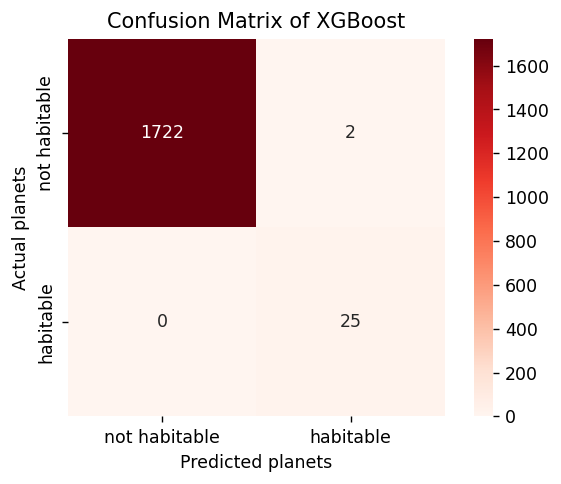

In [ ]:
conf_matrix(conf_xg)
plt.title('Confusion Matrix of XGBoost')

Text(0.5, 1.0, 'Confusion Matrix of K-Nearest Neighbours')

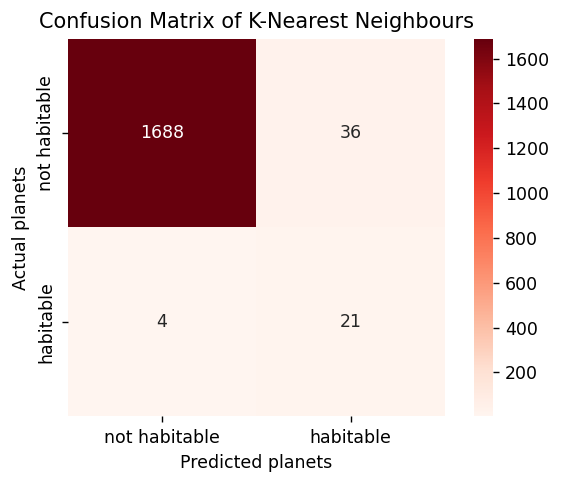

In [ ]:
conf_matrix(conf_knn)
plt.title('Confusion Matrix of K-Nearest Neighbours')

Text(0.5, 1.0, 'Confusion Matrix of Gaussian Naive Bayes')

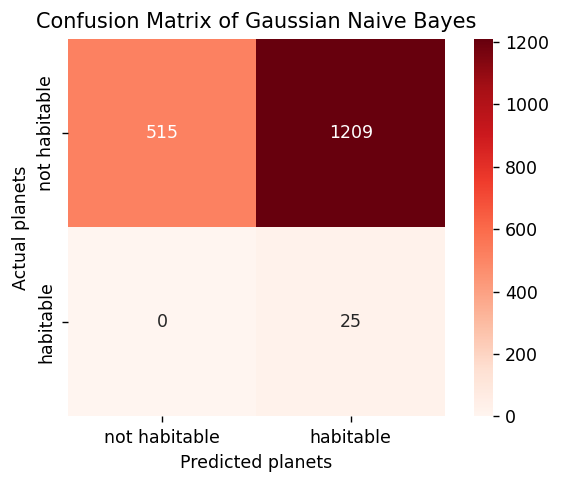

In [ ]:
conf_matrix(conf_nbg)
plt.title('Confusion Matrix of Gaussian Naive Bayes')